# Travail Pratique 3

<div class="alert alert-block alert-success">
<b>Informations générales </b>
</div>

**Professeur**: Stephan Robert

**Assistant(s)**: Félicien Hêche

**Contact**: stephan.o.robert@gmail.com, felicien.heche@gmail.com ou via Teams

**Rendu**:

- Modalité: Travail individuel. Une fois complétées, copiez les réponses dans le ficher "**TP3_APV_S1-2023_Nom_Prenom.*****" (*** = ce que vous voulez qui soit lisible pour nous: .pdf, .html, ...) en remplaçant Nom et Prénom par les votres puis uploader votre fichier sur Cyberlearn.
- Note: Ce TP est noté sur 6, pour un poids de x%

**Étudiant**:

- Prénom Nom

<div class="alert alert-block alert-success">

<b>But du TP </b>
</div>

- Le but de ce travail pratique est de retrouver la fonction de densité $f_{\theta}$ qui a générée un échantillon de points. Pour l'exercice 1, on va travailler avec des données discrètes et dans l'exercice 2, avec des données continues.
- Pour déterminer $f_{\theta}$, on va procéder de la manière suivante. Pour commencer, on va choisir plusieurs lois fonctions de densité candidats $f^{1}_{\theta_{1}}, \ldots f^{k}_{\theta_{k}}$.  Ensuite, on va utiliser mle pour estimer les paramètres $\theta_{1}, \ldots \theta_{k}$. Finalement, on va faire un plot de ces fonctions de densités ainsi que de la densité empirique. Finalement, en se basant sur ce graphe, on va essayer de retrouver la fonction de densité qui a générée cet échantillon.


<!---
<div class="alert alert-block alert-info">
<b>Rappel </b>
</div>
-->

<div class="alert alert-block alert-success">
<b>Table des matières </b>
</div>

Exercice 1
>* Visualisation des données
>* Estimation des paramètres
>* Représentation des distribution calculées.
>* Estimation de la distribution


Exercice 2
>* Visualisation des données
>* Estimation des paramètres
>* Représentation des distribution calculées.
>* Estimation de la distribution




## Exercice 1

Commençons par importer quelques packages.

In [1]:
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt

Comme mentionné ci-dessus, la loi qui a générée les points présents dans le fichier 'data_ex1.pkl' est discrète.

### 1.1 Visualisation des données

Pour commencer, on va tracer la fonction de densité empirique utilisant notre échantillon.

In [2]:
file = open("data_ex1.pkl", "rb")
data = pickle.load(file)

In [3]:
def simple_hist(x, figax=None, bins=None, xlab="", ylab="", legend=""):
    fig, ax = figax if figax is not None else plt.subplots()
    
    ax.hist(x, bins=np.max(x) if bins is None else bins, density=True, label=legend)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

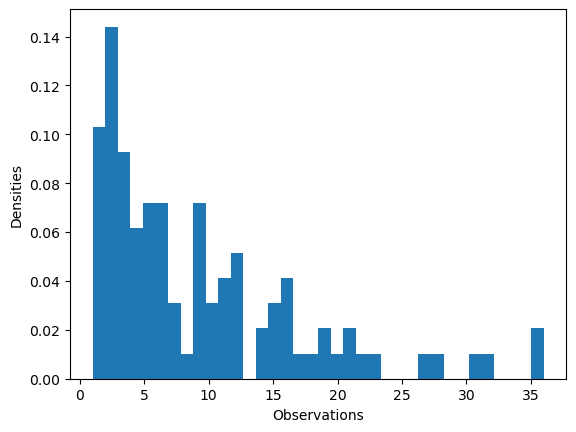

In [4]:
simple_hist(data, xlab="Observations", ylab="Densities")

### 1.2 Estimation des paramètres

On va maintenant implémenter plusieurs fonctions de densités et calculer les mle des paramètres de ces fonctions de densité.

In [5]:
"""
Un exemple pour la loi de Poisson
"""

# mle_estimation
def poisson_mle(data):
    return np.mean(data)

# poisson density function
def poisson_distribution(k, lmb):
    tmp = (lmb ** k) / math.factorial(k)
    return tmp * np.exp(-lmb)

Procéder de la même manière pour au moins $3$ fonctions de densités différentes.

In [6]:
def binomial_mle(data):
    return np.mean(data) / np.size(data)

def binomial_distribution(k, n, p):
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

In [7]:
def geometric_mle(data):
    return 1 / np.mean(data)

def geometric_distribution(k, p):
    return (1 - p) ** (k  - 1) * p

In [8]:
def uniform_mle(data):
    return np.min(data), np.max(data)

def uniform_distribution(k, a, b):
    return 1 / (b - a) if a <= k <= b else 0

### 1.3 Représentation des distribution calculées.

En utilisant les paramètres calculés au point précédent, tracer les distributions $f^{1}_{\theta_{1}}, \ldots f^{k}_{\theta_{k}}$ ainsi que la densité empirique. Pour alléger le graphe, vous pouvez seulemement faire un plot des points. 

In [9]:
def simple_scatter(x, y, figax=None, xlab="", ylab="", legend=""):
    fig, ax = figax if figax is not None else plt.subplots()

    ax.scatter(x, y, c="red", label=legend)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

8.99


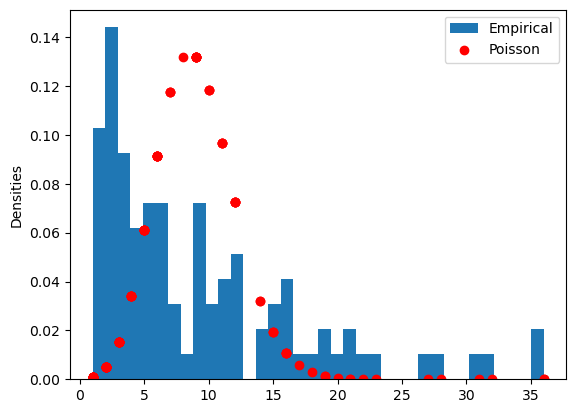

In [10]:
theta = poisson_mle(data)
y = [poisson_distribution(x, theta) for x in data]

fig, ax = plt.subplots()

simple_hist(data, figax=(fig, ax), legend="Empirical")
simple_scatter(data, y, figax=(fig, ax), ylab="Densities", legend="Poisson")

plt.legend()
print(theta)

0.11123470522803114


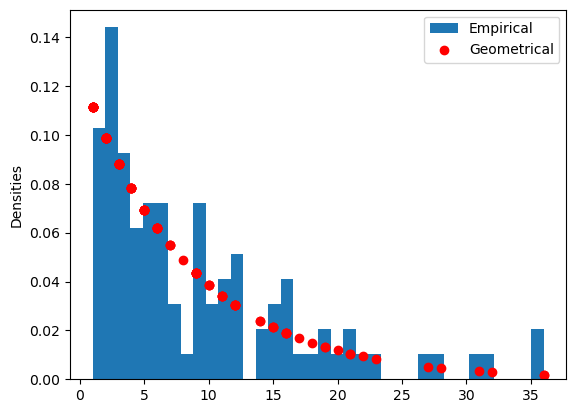

In [11]:
theta = geometric_mle(data)

y = [geometric_distribution(x, theta) for x in data]
fig, ax = plt.subplots()

simple_hist(data, figax=(fig, ax), legend="Empirical")
simple_scatter(data, y, figax=(fig, ax), ylab="Densities", legend="Geometrical")

plt.legend()
print(theta)

0.08990000000000001


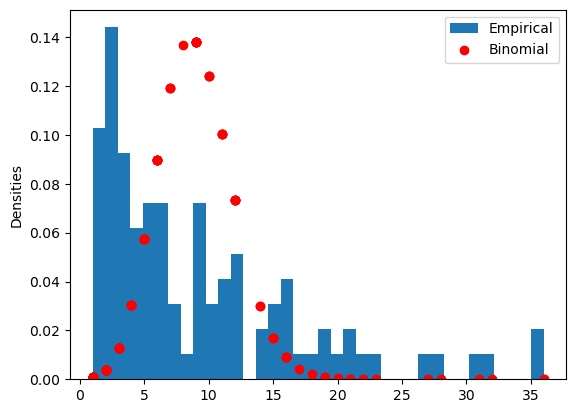

In [12]:
theta = binomial_mle(data)

y = [binomial_distribution(x, len(data), theta) for x in data]
fig, ax = plt.subplots()

simple_hist(data, figax=(fig, ax), legend="Empirical")
simple_scatter(data, y, figax=(fig, ax), ylab="Densities", legend="Binomial")

plt.legend()
print(theta)

1 36


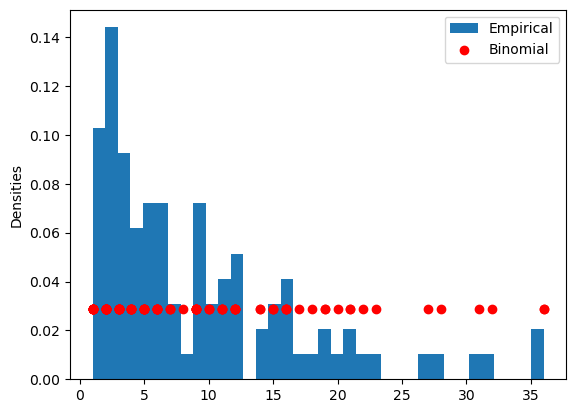

In [13]:
theta1, theta2 = uniform_mle(data)

y = [uniform_distribution(x, theta1, theta2) for x in data]
fig, ax = plt.subplots()

simple_hist(data, figax=(fig, ax), legend="Empirical")
simple_scatter(data, y, figax=(fig, ax), ylab="Densities", legend="Binomial")

plt.legend()
print(theta1, theta2)

### 1.4 Estimation de la distribution

Selon les résulats obtenus essayer de déterminer la loi qui a générée les données présentes dans 'data_ex1.pkl' ainsi que le $\theta$ estimé.

**Réponse** : On constate clairement que la distribution géométrique semble être la plus proche. Avec un $\theta$ estimé d'environ 0.1112

## Exercice 2

Essayer de retrouver la distribution qui a générée les points présents dans le file ci-joint. Mais contrairement à l'exercice précédent, on travaille maintenant avec une distribution continue.

In [14]:
file = open("data_ex2.pkl", "rb")
data = pickle.load(file)

### 2.1 Visualisation des données

Comme d'habitude, on commence par faire le plot des données. Comme on travaille maintenant avec des données continues, il pourrait être pertinent d'utiliser des histogrammes plus petits,  (par exemple $ \sim 0.1$).

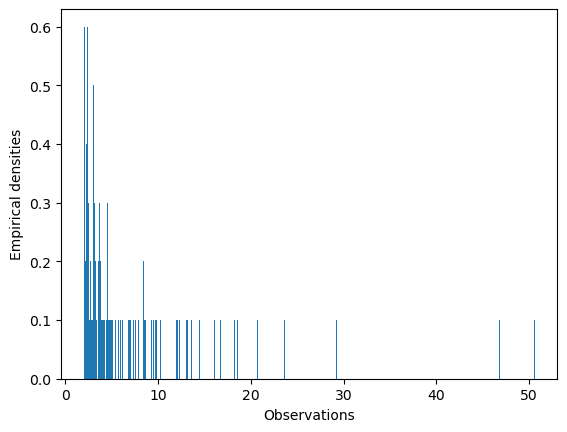

In [15]:
bins = round((np.max(data) - np.min(data)) / 0.1)
simple_hist(data, bins=bins, xlab="Observations", ylab="Empirical densities")

### 2.2 Estimation des paramètres

Répéter la même procédure qu'à l'exercice $1.2$. Comme avant, on attend que vous tester au moins $3$ distributions différentes.

In [16]:
def normal_mle(data):
    mu = np.mean(data)
    sigma = np.sqrt(np.sum((data - mu)**2) / np.size(data))
    return sigma, mu

def normal_distribution(x, sigma, mu):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

In [17]:
def exponential_mle(data):
    return 1 / np.mean(data)
    
def exponential_distribution(x, lamb):
    return lamb * np.exp(-lamb * x)

In [18]:
def uniform_mle(data):
    return np.min(data), np.max(data)

def uniform_distribution(k, a, b):
    return 1 / (b - a) if a <= k <= b else 0

### 2.3 Représentation des distribution calculées.

En utilisant les paramètres calculés au point précédent, tracer les distributions $f^{1}_{\theta_{1}}, \ldots f^{k}_{\theta_{k}}$.

8.082140392797212 7.140390353213095


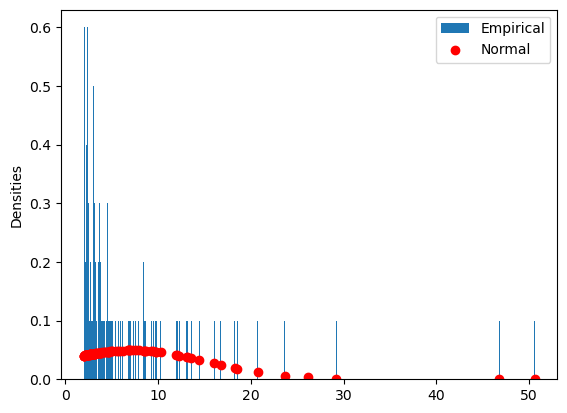

In [19]:
theta1, theta2 = normal_mle(data)

y = [normal_distribution(x, theta1, theta2) for x in data]
fig, ax = plt.subplots()

simple_hist(data, figax=(fig, ax), bins=bins, legend="Empirical")
simple_scatter(data, y, figax=(fig, ax), ylab="Densities", legend="Normal")

plt.legend()
print(theta1, theta2)

0.14004836578017213


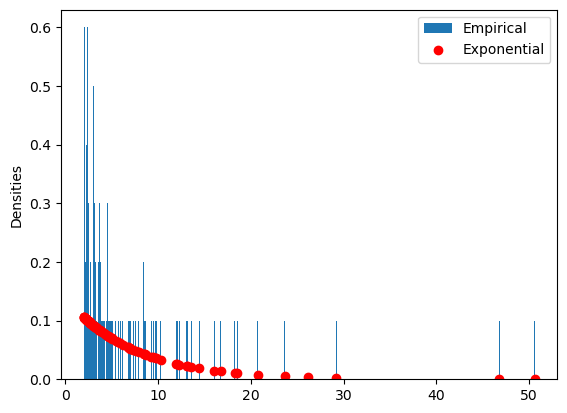

In [20]:
theta = exponential_mle(data)

y = [exponential_distribution(x, theta) for x in data]
fig, ax = plt.subplots()

simple_hist(data, figax=(fig, ax), bins=bins, legend="Empirical")
simple_scatter(data, y, figax=(fig, ax), ylab="Densities", legend="Exponential")

plt.legend()
print(theta)

2.009306140682773 50.609501199017686


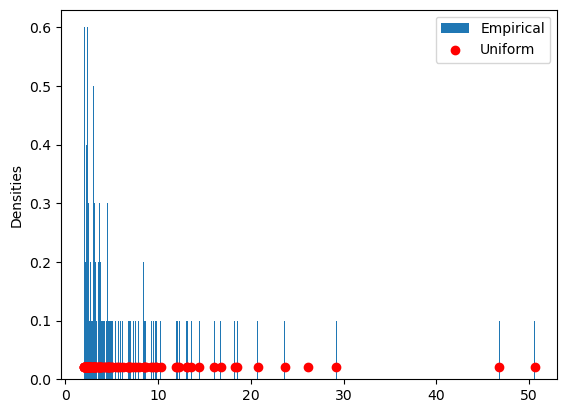

In [21]:
theta1, theta2 = uniform_mle(data)

y = [uniform_distribution(x, theta1, theta2) for x in data]
fig, ax = plt.subplots()

simple_hist(data, figax=(fig, ax), bins=bins, legend="Empirical")
simple_scatter(data, y, figax=(fig, ax), ylab="Densities", legend="Uniform")

plt.legend()
print(theta1, theta2)

### 2.4 Estimation de la fonction de densité

Selon les résulats obtenus essayer de déterminer la distribution qui a générée les données présentes dans 'data_ex2.pkl' ainsi que le $\theta$ estimé.


**Réponse**: On constate que la distribution la plus proche des données semble êter la distribution exponentielle avec $\theta$ estimé valant environ 0.14